In [1]:
# if hit plotting library issues, try resetting LD path for julia
# can set in ~/.local/share/jupyter/kernels/
haskey(ENV, "LD_LIBRARY_PATH") && @assert ENV["LD_LIBRARY_PATH"] == ""
import Pkg
pkgs = [
    "Revise",
    "FASTX",
    "BioSequences",
    "Kmers",
    "Graphs",
    "MetaGraphs",
    "SparseArrays",
    "ProgressMeter",
    "Distributions",
    "HiddenMarkovModels",
    "BioAlignments",
    "StatsBase",
    "Random",
    "StatsPlots",
    "Statistics",
    # "GraphMakie",
    "IterTools",
    "Primes",
    "OnlineStats",
    "IteratorSampling",
    "HypothesisTests",
    "Clustering",
    "Distances",
    "BioAlignments",
    "Statistics",
    "Primes",
    "DataFrames",
    "BioSymbols",
    "LinearAlgebra"
]
# Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
# Pkg.develop(path="/global/cfs/projectdirs/m4269/cjprybol/Mycelia")
# Pkg.develop(path="../../..")
import Mycelia

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ /global/cfs/cdirs/m4269/cjprybol/Mycelia/Manifest.toml:0
[ Info: Precompiling Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd]
[ Info: Skipping precompilation since __precompile__(false). Importing Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd].


In [2]:
PROJECT_BASEDIR = dirname(pwd())
data_dir = joinpath(PROJECT_BASEDIR, "data")
genome_dir = mkpath(joinpath(data_dir, "genomes"))

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes"

In [3]:
working_dir = joinpath(data_dir, "test")
mkpath(working_dir)

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/test"

In [4]:
short_read_sets = unique(map(x -> match(r"^(.+\.\d+x)\.", x).captures[1], filter(x -> occursin(r"\.fna\.art", x) && occursin(r"\.fq\.gz", x) && !occursin("trimming_report", x) && !occursin("_val_", x), sort(readdir(genome_dir, join=true), by=x->filesize(x)))))


18-element Vector{SubString{String}}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 68 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 69 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 71 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 70 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 77 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 72 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 78 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ "na.normaliz

In [5]:
short_read_set = short_read_sets[1]

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x"

In [6]:
forward = short_read_set * ".1_val_1.fq.gz"
reverse = short_read_set * ".2_val_2.fq.gz"

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz"

In [7]:
short_read_set_joint_fastq = short_read_set * ".joint.fq.gz"
if !isfile(short_read_set_joint_fastq)
    run(pipeline(`cat $(forward) $(reverse)`, short_read_set_joint_fastq))
end
short_read_set_joint_fastq
original_fastq = short_read_set_joint_fastq

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.fq.gz"

In [8]:
# filesize(short_read_set_joint_fastq)

In [9]:
# run(pipeline(`gzip -dc $(short_read_set_joint_fastq)`, `head`))

In [10]:
# join them into a single fastq

In [11]:
# long_read_fastqs = sort(filter(x -> occursin(r"\.filtlong\.fq\.gz$", x), readdir(genome_dir, join=true)), by=x->filesize(x))

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 3, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 68], [0, 1, 10, 32], false)
  4.424960 seconds (1.46 M allocations: 92.623 MiB, 99.99% compilation time)
(k, predicted_saturation) = (3, 1.0)


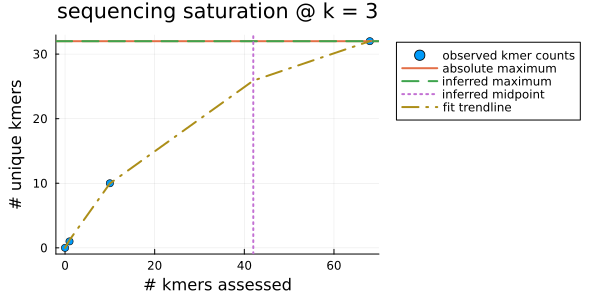

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 5, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 8730], [0, 1, 10, 93, 360, 445], true)
  0.000144 seconds (245 allocations: 23.000 KiB)
(k, predicted_saturation) = (5, 0.869140625)


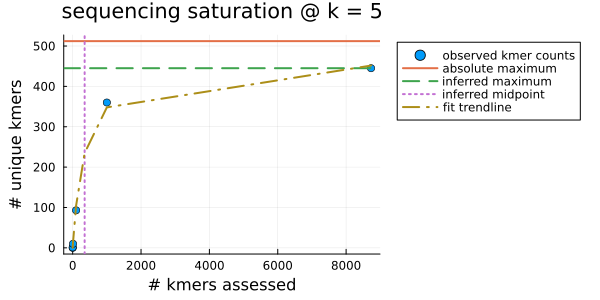

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 7, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 8610], [0, 1, 10, 100, 605, 1031], true)
  0.000085 seconds (205 allocations: 19.188 KiB)
(k, predicted_saturation) = (7, 0.1258544921875)


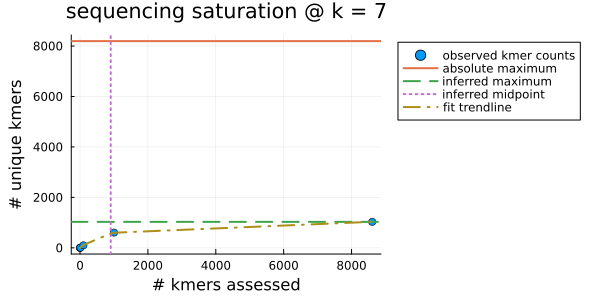

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 11, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 8370], [0, 1, 10, 100, 646, 1152], true)
  0.000079 seconds (205 allocations: 19.188 KiB)
(k, predicted_saturation) = (11, 0.00054931640625)


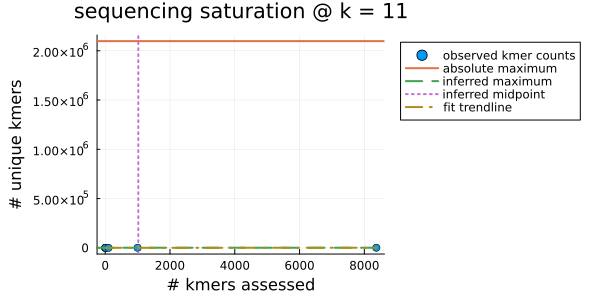

[ Info: polishing with k = 11
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
[ Info: polishing with k = 13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 17
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 31
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 53
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 89
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


8-element Vector{@NamedTuple{fastq::String, k::Int64}}:
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.fq.gz", k = 11)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.k13.fq.gz", k = 13)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.fq.gz", k = 17)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.fq.gz", k = 19)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.fq.gz", k = 23)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/var

In [12]:
# almost no time at all for short reads
polishing_results = Mycelia.iterative_polishing(original_fastq)

In [13]:
# assembly_fastq = last(polishing_results).fastq
# assembly_k = last(polishing_results).k

assembly_fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"
assembly_k = 89

In [16]:
mean_read_length = Statistics.mean([length(FASTX.sequence(record)) for record in Mycelia.open_fastx(assembly_fastq)])

140.2

In [17]:
# assembly_k = maximum(filter(k -> k < mean_read_length, Mycelia.ks()))

In [21]:
kmer_graph = Mycelia.build_directed_kmer_graph(fastq=assembly_fastq, k=assembly_k)

{1181, 1170} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [22]:
# heuristic - should be based on something better or removed altogether
max_filter = 5

initial_connected_components = length(Graphs.connected_components(kmer_graph))
coverage_threshold = 1
tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
while (length(Graphs.connected_components(candidate_subgraph)) == initial_connected_components) && (coverage_threshold < max_filter)
    coverage_threshold += 1
    tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
    candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
end
coverage_threshold -= 1
@show coverage_threshold

tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
filtered_graph, filtered_graph_vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
# candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, [v for v in Graphs.vertices(kmer_graph) if kmer_graph.vprops[v][:count] >= coverage_threshold])

coverage_threshold = 0


({1181, 1170} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181])

In [23]:
connected_components = sort(Graphs.connected_components(filtered_graph), by=x->length(x), rev=true)

11-element Vector{Vector{Int64}}:
 [9, 11, 26, 29, 34, 43, 44, 58, 63, 65  …  1137, 1139, 1140, 1141, 1147, 1165, 1170, 1171, 1179, 1181]
 [1, 2, 4, 5, 7, 8, 10, 16, 17, 18  …  1087, 1099, 1100, 1115, 1125, 1154, 1155, 1158, 1175, 1176]
 [24, 25, 49, 66, 70, 76, 77, 78, 100, 112  …  1114, 1134, 1136, 1145, 1146, 1159, 1164, 1169, 1178, 1180]
 [3, 6, 14, 15, 19, 20, 23, 45, 52, 53  …  1102, 1105, 1109, 1126, 1128, 1131, 1133, 1149, 1168, 1174]
 [12, 37, 46, 50, 55, 57, 59, 73, 90, 91  …  1068, 1071, 1085, 1122, 1129, 1143, 1148, 1156, 1166, 1172]
 [56, 123, 134, 152, 153, 163, 197, 202, 204, 207  …  964, 1032, 1039, 1046, 1074, 1098, 1120, 1124, 1142, 1150]
 [13, 38, 47, 51, 60, 74, 92, 108, 143, 148  …  972, 985, 1004, 1043, 1052, 1072, 1086, 1123, 1157, 1167]
 [28, 117, 121, 149, 173, 178, 183, 192, 195, 210  …  1018, 1029, 1054, 1062, 1078, 1091, 1112, 1135, 1152, 1161]
 [27, 30, 35, 97, 116, 120, 130, 140, 172, 194  …  1040, 1061, 1069, 1077, 1090, 1095, 1111, 1116, 1151, 1160]
 [31

In [24]:
length.(connected_components)

11-element Vector{Int64}:
 200
 196
 173
 145
 145
  63
  62
  62
  61
  61
  13

In [25]:
connected_component_sequences = BioSequences.LongDNA{2}[]
for connected_component in connected_components
    connected_component_subgraph, connected_component_subgraph_vertex_map = Graphs.induced_subgraph(filtered_graph, connected_component)
    sorted_connected_component_subgraph = Graphs.topological_sort_by_dfs(connected_component_subgraph)
    dsp_result = Graphs.dijkstra_shortest_paths(connected_component_subgraph, first(sorted_connected_component_subgraph))
    maxdist, maxdist_index = findmax(map(d -> d == Inf ? zero(d) : d, dsp_result.dists))
    connected_component_subgraph_longest_path = Graphs.enumerate_paths(dsp_result, maxdist_index)
    # @show connected_component_subgraph_longest_path
    original_graph_kmer_indices = filtered_graph_vertex_map[connected_component_subgraph_vertex_map[connected_component_subgraph_longest_path]]
    connected_component_subgraph_longest_path_reconstructed_sequence = Mycelia.kmer_path_to_sequence(kmer_graph.gprops[:ordered_kmers][original_graph_kmer_indices])
    push!(connected_component_sequences, connected_component_subgraph_longest_path_reconstructed_sequence)
end
connected_component_sequences
length.(connected_component_sequences)

11-element Vector{Int64}:
 288
 228
 227
 233
 233
 151
 150
 150
 149
 149
 101

In [26]:
# first_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[1]))))
# second_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[2]))))
# intersect(first_sequence_canonical_kmers, second_sequence_canonical_kmers)

In [27]:
assembled_contig_quality_table = DataFrames.DataFrame()
for (i, connected_component_sequence) in enumerate(connected_component_sequences)
    this_table = Mycelia.assess_assembly_quality(assembled_sequence=connected_component_sequence, fastq=original_fastq)
    this_table[!, "contig"] .= "$(i)"
    this_table[!, "contig_length"] .= length(connected_component_sequence)
    append!(assembled_contig_quality_table, this_table)
end
assembled_contig_quality_table

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Row,k,cosine_distance,js_divergence,qv,contig,contig_length
,Int64,Float64,Float64,Float64,String,Int64
1,11,0.0,0.0,Inf,1,288
2,13,0.0,0.0,Inf,1,288
3,17,0.0,0.0,Inf,1,288
4,19,0.0,0.0,Inf,1,288
5,23,0.0,0.0,Inf,1,288
6,31,0.0,0.0,Inf,1,288
7,53,0.0,0.0,Inf,1,288
8,11,0.0,0.0,Inf,2,228
9,13,0.0,0.0,Inf,2,228


In [44]:
function pairwise_align_sequences(sequences)
    best_pairwise_alignments = Array{Any}(undef, length(sequences), length(sequences))
    # best_pairwise_alignment_scores = zeros(length(connected_component_sequences), length(connected_component_sequences))
    scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1)
    for (a, a_seq) in enumerate(sequences)
        for (b, b_seq) in enumerate(sequences)
            b_seq_revcom = BioSequences.reverse_complement(b_seq)
            forward_alignment = BioAlignments.pairalign(BioAlignments.OverlapAlignment(), a_seq, b_seq, scoremodel)
            reverse_complement_alignment = BioAlignments.pairalign(BioAlignments.OverlapAlignment(), a_seq, b_seq_revcom, scoremodel)
            if BioAlignments.score(forward_alignment) > BioAlignments.score(reverse_complement_alignment)
                best_alignment = forward_alignment
            else
                best_alignment = reverse_complement_alignment
            end
            best_pairwise_alignments[a, b] = best_alignment
            # best_pairwise_alignment_scores[a, b] = BioAlignments.score(best_alignment)
        end
    end
    best_pairwise_alignments
end

function find_best_alignment(best_pairwise_alignments)
    alignment_scores = BioAlignments.score.(best_pairwise_alignments)
    off_diagonal_mask = .!Matrix(LinearAlgebra.I, size(best_pairwise_alignments))
    max_off_diagonal_score = maximum(alignment_scores[off_diagonal_mask])
    return findfirst(alignment_scores .== max_off_diagonal_score)
end

"""
pass in alignment_result.aln or BioAlignments.alignment(alignment_result)
"""
function consensus_sequence(alignment)
    consensus_symbols = BioSymbols.DNA[]
    for alignment_tuple in collect(alignment)
        push!(consensus_symbols, rand(filter(x -> x != BioSymbols.DNA_Gap, alignment_tuple)))
    end
    consensus_seq = BioSequences.LongDNA{2}(consensus_symbols)
    return consensus_seq
end

consensus_sequence

In [45]:
assembly_sequences = deepcopy(connected_component_sequences)
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1095
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CATTGGGCCTAAACAAGGCGAAGCAAGTCGATTCTGCTACCTTGGCGCTATGGTTTGGAC  60

  seq:   0 ---------GTCTAACCTATAGAACAGTGTGGTATGAAGCGTAAATGTCCGCTTAGTTTC  51
                    |||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 AAATCGCTGGTCTAACCTATAGAACAGTGTGGTATGAAGCGTAAATGTCCGCTTAGTTTC 120

  seq:  52 GAGGCTTTGCTCGTTCCCATCGATCGCGAGTGTAGGAATAGAACCCTCATATAGAATAGG 111
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 GAGGCTTTGCTCGTTCCCATCGATCGCGAGTGTAGGAATAGAACCCTCATATAGAATAGG 180

  seq: 112 ATTCGACATCAATACACGAGAAAAATGGAGGGATGTAATTGGGCACACTGTGTGTGTAAC 171
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [46]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 741
  seq:   0 -----CCTCTTTACTGAGAAGTATAGGCCAGACATGCTCCAACTCAAATCCTTGGGCAAT  55
                |||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   1 CCTACCCTCTTTACTGAGAAGTATAGGCCAGACATGCTCCAACTCAAATCCTTGGGCAAT  60

  seq:  56 ACACCGCGACCCTCTACTGCATCTCACATGCCGAATATTTGAGACCGAGGTTGCCGCATC 115
           |||||||||||||||||||||||||||||| |||||||||||||||||||||||||||||
  ref:  61 ACACCGCGACCCTCTACTGCATCTCACATGACGAATATTTGAGACCGAGGTTGCCGCATC 120

  seq: 116 AATAGTTCCCTCGTCATACGCCGGATACAGTGCCG------------------------- 150
           |||||||||||||||||||||||||||||||||||                         
  ref: 121 AATAGTTCCCTCGTCATACGCCGGATACAGTGCCGGTTACGCGTGCCGAACGATCGTTCG 180

  seq: 150 ----------------------------------------------------- 150
                                                                
  ref: 181 ACCCACACG

In [47]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 631
  seq:   1 ACGGTTGAGGGTGTTCTACTTTGGGTCTGCCGTAACTACCATTAACGCTTGGGGGTGTTG  60
                                |||||||||||||||||||||||||||||||||||||||
  ref:   0 ---------------------TGGGTCTGCCGTAACTACCATTAACGCTTGGGGGTGTTG  39

  seq:  61 GATCTAACGAGCTGCAGTACGAGAGATTCGGATACTGAGCTCGAGCAGTCAAGTCAATTG 120
           ||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||||
  ref:  40 GATCTAACGAGCTGCAGTACGAGAGATTCGGATACTGAGCTCGAGAAGTCAAGTCAATTG  99

  seq: 121 TTTTTCGCAGAGTCCGCGAGCACCCATGG--------------------- 149
           |||||||||||||||||||||||||||||                     
  ref: 100 TTTTTCGCAGAGTCCGCGAGCACCCATGGAGCGTCCGCACACACGTAGCC 149


In [48]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 621
  seq:   1 TTGGGGGTGTTGGATCTAACGAGCTGCAGTACGAGAGATTCGGATACTGAGCTCGAGCAG  60
                                   ||||||||||||||||||||||||||||||||||||
  ref:   0 ------------------------TGCAGTACGAGAGATTCGGATACTGAGCTCGAGCAG  36

  seq:  61 TCAAGTCAATTGTTTTTCACAGAGTCCGCGAGCACCCATGGAGCGTCCGCACACACGTAG 120
           |||||||||||||||||| |||||||||||||||||||||||||||||||||||||||||
  ref:  37 TCAAGTCAATTGTTTTTCGCAGAGTCCGCGAGCACCCATGGAGCGTCCGCACACACGTAG  96

  seq: 121 CCATTGGGGACACGCCCATTGATCCATGGG------------------------------ 150
           ||||||||||||||||||||||||||||||                              
  ref:  97 CCATTGGGGACACGCCCATTGATCCATGGGATGAACCTGGGTCGTGGAGCCGGAGAGCTT 156

  seq: 150 ------------------------------------------------------------ 150
                                                                       
  ref:

In [49]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 610
  seq:   1 ACGGTTGAGGGTGTTCTACTTTGGGTCTGCCGTAACTACCATTAACGCTTGGGGGTGTTG  60
                                                           ||||||||||||
  ref:   0 ------------------------------------------------TTGGGGGTGTTG  12

  seq:  61 GATCTAACGAGCTGCAGTACGAGAGATTCGGATACTGAGCTCGAGCAGTCAAGTCAATTG 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  13 GATCTAACGAGCTGCAGTACGAGAGATTCGGATACTGAGCTCGAGCAGTCAAGTCAATTG  72

  seq: 121 TTTTTCGCAGAGTCCGCGAGCACCCATGGAGCGTCCGCACACACGTAGCC---------- 170
           ||||||||||||||||||||||||||||||||||||||||||||||||||          
  ref:  73 TTTTTCGCAGAGTCCGCGAGCACCCATGGAGCGTCCGCACACACGTAGCCATTGGGGACA 132

  seq: 170 ------------------------------------------------------------ 170
                                                                       
  ref:

In [50]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 480
  seq:   1 CTTAACACGTGAAAGATCAACAGTCCGGATATTAGCTAAGTATCGGTACACCATCCGAGA  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 AGAGACCCCACACTCCCCATGTAAAAACGGAACCGCTTTGGCGTCTCAGAGATACGCGCC 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 AACAAGCAGTAGCATTGGGCCTAAACAAGGCGAAGCAAGTCGATTCTGCTACCTTGGCGC 180
                       ||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   0 ------------CATTGGGCCTAAACAAGGCGAAGCAAGTCGATTCTGCTACCTTGGCGC  48

  seq: 181 TATGGTTTGGACAAATCGCTGGTCTAACCTATAGAACAGTGTGGTATG------------ 228
           ||||||||||||||||||||||||||||||||||||||||||||||||            
  ref:

In [51]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 450
  seq:   1 CCTACCCTCTTTACTGAGAAGTATAGGCCAGACATGCTCCAACTCAAATCCTTGGGCAAT  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 ACACCGCGACCCTCTACTGCATCTCACATGCCGAATATTTGAGACCGAGGTTGCCGCATC 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 AATAGTTCCCTCGTCATACGCCGGATACAGTGCCGGTTACGCGTGCCGAACGATCGTTCG 180
                                  |||||||||||||||||||||||||||||||||||||
  ref:   0 -----------------------GATACAGTGCCGGTTACGCGTGCCGAACGATCGTTCG  37

  seq: 181 ACCCACACGTGTGCCAATGTATTTCGTTACACACACAGTGTGCCCAATTACAT------- 233
           |||||||||||||||||||||||||||||||||||||||||||||||||||||       
  ref:

In [52]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 430
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GCGTTCTCTAGGTAGGACTTACGCCAGTAGGGATACTTGGACGGGTAGGGGTTAGAATAT  60

  seq:   0 -----AATCGAGTCCTCTTTGAGCGTTGAATGTGCGATACAGGGCATAAAGGTACTAAAG  55
                |||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 GGTGAAATCGAGTCCTCTTTGAGCGTTGAATGTGCGATACAGGGCATAAAGGTACTAAAG 120

  seq:  56 CAGAGTGACCCCTGCCCTATATCAAAGAACAAATATGCGTGGACGC 101
           |||||||||||||||||||||||||||||||               
  ref: 121 CAGAGTGACCCCTGCCCTATATCAAAGAACA--------------- 151


In [53]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 401
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CTTAACACGTGAAAGATCAACAGTCCGGATATTAGCTAAGTATCGGTACACCATCCGAGA  60

  seq:   0 --------------------------ACGG-------TTGAGGGTGT-TC-----TAC--  19
                                     ||||       |||   | || ||     |||  
  ref:  61 AGAGACCCCACACTCCCCATGTAAAAACGGAACCGCTTTG---GCGTCTCAGAGATACGC 117

  seq:  19 ------------T----TTGGGTCT------GCCGTAA-CTA--CCATTA----ACGCTT  50
                       |    ||||| ||      | || || | |  | |||     || |||
  ref: 118 GCCAACAAGCAGTAGCATTGGGCCTAAACAAGGCG-AAGCAAGTCGATTCTGCTAC-CTT 175

  seq:  51 GG-G----GGTGTTGGA-----------TCTAACGAGCTGCAGTACGAGAGATTCGGATA  94
           || |    ||| |||||           ||||||   ||  || || || | |  || ||
  ref:

3×3 Matrix{Any}:
 BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}(score=830)  …  BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}(score=227)
 BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}(score=241)     BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}(score=401)
 BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}(score=227)     BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{B

In [58]:
a, b, c = assembly_sequences

3-element Vector{BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
 GCGTTCTCTAGGTAGGACTTACGCCAGTAGGGATACTTG…ACCCCTGCCCTATATCAAAGAACAAATATGCGTGGACGC
 CCTACCCTCTTTACTGAGAAGTATAGGCCAGACATGCTC…TTAGCTAATATCCGGACTGTTGATCTTTCACGTGTTAAG
 ACGGTTGAGGGTGTTCTACTTTGGGTCTGCCGTAACTAC…CTAAGTATCGGTACACCATCCGAGAAGAGACCCCACACT

In [61]:
# best_pairwise_alignments = Array{Any}(undef, length(sequences), length(sequences))
# best_pairwise_alignment_scores = zeros(length(connected_component_sequences), length(connected_component_sequences))
scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1)
BioAlignments.pairalign(BioAlignments.OverlapAlignment(), a, b, scoremodel)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 211
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CCTACCCTCTTTACTGAGAAGTATAGGCCAGACATGCTCCAACTCAAATCCTTGGGCAAT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ACACCGCGACCCTCTACTGCATCTCACATGCCGAATATTTGAGACCGAGGTTGCCGCATC 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 AATAGTTCCCTCGTCATACGCCGGATACAGTGCCGGTTACGCGTGCCGAACGATCGTTCG 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [62]:
BioAlignments.pairalign(BioAlignments.OverlapAlignment(), a, BioSequences.reverse_complement(b), scoremodel)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 241
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CTTAACACGTGAAAGATCAACAGTCCGGATATTAGCTAAGTATCGGTACACCATCCGAGA  60

  seq:   0 ----------------------------------------GCGTTCTCTAGGTAGGACTT  20
                                                   |||| ||| ||  || |  |
  ref:  61 AGAGACCCCACACTCCCCATGTAAAAACGGAACCGCTTTGGCGT-CTC-AG--AG-A--T 113

  seq:  21 ACGC---------CAGTAGGGATAC-TTGGACGGGTAGGGGTTAGAATATGGTGAA--A-  67
           ||||         ||||||     | |||| |   ||        || | || |||  | 
  ref: 114 ACGCGCCAACAAGCAGTAG-----CATTGGGCC--TA--------AACAAGGCGAAGCAA 158

  seq:  67 -TCGAGTC--CT-CTTTGAGCG-------TTG----AAT-G-TG-------CGATA---C 100
            |||| ||  || | ||| |||       |||    ||| | ||       | |||   |
  ref:

In [63]:
BioAlignments.pairalign(BioAlignments.OverlapAlignment(), a, c, scoremodel)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 227
  seq:   0 ------------------------------------------------------GCGTTC   6
                                                                 | ||| 
  ref:   1 ACGGTTGAGGGTGTTCTACTTTGGGTCTGCCGTAACTACCATTAACGCTTGGGGGTGTTG  60

  seq:   6 --TCTAGGTAGGA-CT----TACGCCAGTAG----GGATACTTGGA---CGGGTAGGGGT  52
             ||||   | || ||    ||||  || ||    |||||||  ||   || | ||    
  ref:  61 GATCTA---ACGAGCTGCAGTACG--AG-AGATTCGGATACT--GAGCTCGAGCAG---- 108

  seq:  53 T--AG--AATATGGT----GAAATCGAGTCCTCTTTGAGCGTTGA---ATGT-GCGATAC 100
           |  ||  ||| || |    | |   |||||| |   ||||    |   |||  ||| | |
  ref: 109 TCAAGTCAAT-TGTTTTTCGCA---GAGTCCGC---GAGC----ACCCATGGAGCG-TCC 156

  seq: 101 AGGGCATAAAGGTACTAAAGC-A--GAGTGACCCCTGCCCTAT--ATCAA----A-GAAC 150
              ||| | | |||     || |  | | ||| |  |||| ||  ||| |    | ||||
  ref:

In [64]:
BioAlignments.pairalign(BioAlignments.OverlapAlignment(), a, BioSequences.reverse_complement(c), scoremodel)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 225
  seq:   0 ------GCGT-TCT-CTAGG-TAGG---------ACTTACGCCAGTA---GG------GA  33
                 | || ||| || || | ||         ||||| || | ||   ||      ||
  ref:   1 AGTGTGGGGTCTCTTCTCGGAT-GGTGTACCGATACTTA-GCTAATATCCGGACTGTTGA  58

  seq:  34 TACTTGGACGGGT--AG------GG-------------GTTAGAAT---ATGGTGA--AA  67
           | |||  ||| ||  ||      ||             |||   ||   ||||  |  ||
  ref:  59 T-CTTTCACGTGTTAAGCTCTCCGGCTCCACGACCCAGGTTC--ATCCCATGG--ATCAA 113

  seq:  68 T---CGAGTCCTCTTTGAGC---GTTGAATGTGCG-A---TACA-GGG--CATAAAGGTA 114
           |   || |||| |  || ||   || |  |||||| |   | || |||  | |   || |
  ref: 114 TGGGCGTGTCCCCAATG-GCTACGT-G--TGTGCGGACGCTCCATGGGTGC-TCGCGG-A 167

  seq: 115 CT------AAAGCAGAGTGACCC--CTGC-C---CT-A-TATCAAAGAACAAATATG-CG 159
           ||      ||| || | ||||    |||| |   || | ||||      | ||| |  ||
  ref:

In [65]:
BioAlignments.pairalign(BioAlignments.OverlapAlignment(), b, c, scoremodel)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 399
  seq:   1 CCTACCCTCTTTAC---TGAGAAG----TATA----GGCCAGACATGC--TCCAACT--C  45
                       ||   ||||  |    | ||    ||   | | |||  |  ||||  |
  ref:   0 ------------ACGGTTGAG--GGTGTTCTACTTTGG---GTC-TGCCGT--AACTACC  40

  seq:  46 A--AATC-CTTGGGCAATACACCGCGACCCTCTACTGCATCTCAC-A--TGC----CGA-  94
           |  || | ||||||         | |    | |  || |||| || |  |||    ||| 
  ref:  41 ATTAA-CGCTTGGG---------G-G----TGT--TGGATCTAACGAGCTGCAGTACGAG  83

  seq:  95 ATATT-------TGAGAC-CGAG--GTTGCCGCA--TCAATAGTTCCCTCGTCATACGCC 142
           | |||       |||| | ||||  ||     ||  ||||| |||   |     | ||| 
  ref:  84 AGATTCGGATACTGAG-CTCGAGCAGT-----CAAGTCAATTGTT---T-----TTCGCA 129

  seq: 143 GGATACAGTGCCGGTTACGCGTGCCGAAC-----GATCGTTCGACCCACACGTGTGCCAA 197
           |     ||| |||      || ||   ||     || ||| || | |||||||  |||| 
  ref:

In [66]:
BioAlignments.pairalign(BioAlignments.OverlapAlignment(), b, BioSequences.reverse_complement(c), scoremodel)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 401
  seq:   1 CCTACCCTCTTTACTGAGAAGTATAGGCCAGACATGCTCCAACTCAAATCCTTGG-GCAA  59
                              ||| | ||   | | | || |   ||  ||    || |   
  ref:   0 -------------------AGTGTGGG---GTC-T-CTTC---TCGGAT----GGTG---  26

  seq:  60 TACACCGCGACCCTCTACTGCATCTCACATGCCGAATATTTGAGACCGAG---GTTGCCG 116
           |||    |||     ||||  | ||         |||||      ||| |   ||||   
  ref:  27 TAC----CGA-----TACTT-AGCT---------AATAT------CCG-GACTGTTG---  57

  seq: 117 CATCAATAGTTCCC-TCGTCATACGCCGGATACAGTGCCGGTTACGCGTGCCGAACGATC 175
            |||  |  ||| | | ||  || ||    | |  | |||| |       ||  |||| |
  ref:  57 -ATC--T--TTCACGT-GT--TAAGC----T-C--T-CCGGCT-------CC--ACGACC  92

  seq: 175 ---GTTCGA-CCCACACGTG--TGCCAATGTATTTCGTTACACACACAGTGTGCCCAAT- 228
              |||| | ||||    ||  |  |||||      |   |       |||| |||||| 
  ref:

KeyError: KeyError: key "usage_request" not found

KeyError: KeyError: key "usage_request" not found

89

In [68]:
assembly_sequence_canonical_kmer_counts = Mycelia.count_canonical_kmers.(Kmers.DNAKmer{assembly_k}, assembly_sequences)

3-element Vector{OrderedCollections.OrderedDict{Kmers.DNAKmer{89, 3}, Int64}}:
 OrderedCollections.OrderedDict(AAATCGAGTCCTCTTTGAGCGTTGAATGTGCGATACAGG…CTAAAGCAGAGTGACCCCTGCCCTATATCAAAGAACAAA => 1, AATATGGTGAAATCGAGTCCTCTTTGAGCGTTGAATGTG…ATAAAGGTACTAAAGCAGAGTGACCCCTGCCCTATATCA => 1, AATCGAGTCCTCTTTGAGCGTTGAATGTGCGATACAGGG…TAAAGCAGAGTGACCCCTGCCCTATATCAAAGAACAAAT => 1, ACATTCAACGCTCAAAGAGGACTCGATTTCACCATATTC…CGTCCAAGTATCCCTACTGGCGTAAGTCCTACCTAGAGA => 1, ACCTTTATGCCCTGTATCGCACATTCAACGCTCAAAGAG…ACCATATTCTAACCCCTACCCGTCCAAGTATCCCTACTG => 1, ACGCATATTTGTTCTTTGATATAGGGCAGGGGTCACTCT…TTTATGCCCTGTATCGCACATTCAACGCTCAAAGAGGAC => 1, ACGCCAGTAGGGATACTTGGACGGGTAGGGGTTAGAATA…AGTCCTCTTTGAGCGTTGAATGTGCGATACAGGGCATAA => 1, ACGGGTAGGGGTTAGAATATGGTGAAATCGAGTCCTCTT…TGTGCGATACAGGGCATAAAGGTACTAAAGCAGAGTGAC => 1, ACTCTGCTTTAGTACCTTTATGCCCTGTATCGCACATTC…AGGACTCGATTTCACCATATTCTAACCCCTACCCGTCCA => 1, ACTTACGCCAGTAGGGATACTTGGACGGGTAGGGGTTAG…ATCGAGTCCTCTTTGAGCGTTGAATGTGCGATACAGGGC => 1…)
 OrderedCollections.OrderedD

In [77]:
intersect(keys(assembly_sequence_canonical_kmer_counts[1]), keys(assembly_sequence_canonical_kmer_counts[2]))

Set{Kmers.DNAKmer{89, 3}}()

In [79]:
Mycelia.jaccard_similarity(keys(assembly_sequence_canonical_kmer_counts[1]), keys(assembly_sequence_canonical_kmer_counts[2]))

0.0

In [80]:
Mycelia.jaccard_similarity(keys(assembly_sequence_canonical_kmer_counts[1]), keys(assembly_sequence_canonical_kmer_counts[3]))

0.0

In [81]:
Mycelia.jaccard_similarity(keys(assembly_sequence_canonical_kmer_counts[2]), keys(assembly_sequence_canonical_kmer_counts[3]))

0.0

In [55]:
length.(assembly_sequences)

3-element Vector{Int64}:
 166
 577
 299

In [ ]:
# result = DataFrames.combine(DataFrames.groupby(assembled_contig_quality_table, :contig), :qv => Statistics.mean => :mean_qv, :qv => minimum => :min_qv, :qv => maximum => :max_qv)

In [ ]:
# 3 report out both alleles

In [83]:
final_assembly_sequences = assembly_sequences
assembly_fasta = replace(assembly_fastq, Mycelia.FASTQ_REGEX => ".assembly_k$(assembly_k).fna")
open(assembly_fasta, "w") do io
    fastx_io = FASTX.FASTA.Writer(io)
    for (i, sequence) in enumerate(final_assembly_sequences)
        identifier = "contig$(i)_length=$(length(sequence))"
        fasta_record = FASTX.FASTA.Record(identifier, sequence)
        write(fastx_io, fasta_record)
    end
    close(fastx_io)
end
assembly_fasta

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k89.fna"

KeyError: KeyError: key "usage_request" not found

In [ ]:
# readlines(assembly_fasta)